## Data Analysis for Automobile Sales
### Output :
- Find the optimum price for sale of a car with specific characteristics

#### I. Data Wrangling

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing data
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

df = pd.read_csv(path)

df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
#recollecting data
df = pd.read_csv(path, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Create headers 
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
#replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.isnull().sum()


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
# replace missing values : "num of doors" and "peak rpm" with mode; 
# "normalized-losses","horse power","stroke" and "bore" with mean, 
missing_data = df.isnull()

# "normalized-losses"
nl_avg = df["normalized-losses"].astype("float").mean(axis = 0)
df["normalized-losses"].replace(np.nan, nl_avg, inplace = True)

# "bore"
bore_avg = df["bore"].astype("float").mean(axis=0)
df["bore"].replace(np.nan, bore_avg, inplace=True)

# "horsepower"
hp_avg = df["horsepower"].astype("float").mean(axis = 0)
df["horsepower"].replace(np.nan, hp_avg, inplace=True)

# "stroke"
stk_avg = df["stroke"].astype("float").mean(axis=0)
df["stroke"].replace(np.nan, stk_avg, inplace=True)

In [7]:
# determining the mode of "num-of-doors" and replace the missing values with it
df['num-of-doors'].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, df['num-of-doors'].value_counts().idxmax(), inplace=True)

#determining the mode of "peak RPM" and replace the missing values with it
df["peak-rpm"].value_counts().idxmax()
df["peak-rpm"].replace(np.nan, df["peak-rpm"].value_counts().idxmax(), inplace=True)

In [8]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [9]:
# Drop all rows with empty price
df.dropna(subset=["price"], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)
# check whether data types already proper or not
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
# change data types
df[["bore", "stroke", "highway-mpg"]] = df[["bore", "stroke", "highway-mpg"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
print("..")

..


In [11]:
# Standardization to metric units
# highway-mpg to highway-L/100km
df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"highway-mpg":"highway-L/100km"}, inplace=True)

# city-mpg to L/100km
df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"city-mpg":"city-L/100km"}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0


In [12]:
# normalization
df["height"]=df["height"]/df["height"].max()
df["length"]=df["length"]/df["length"].max()
df["width"]=df["width"]/df["width"].max()
print(df["engine-size"].min(), df["engine-size"].max())

61 326


In [13]:
# Some parameters are easier to read in bins
# Binning "horsepower" and "engine-size"
# "Horsepower"
df["horsepower"]=df["horsepower"].astype("int", copy=True)

bins_hp = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
hp_group = ["low", "medium", "high"]
df["horsepower_bin"] = pd.cut(df["horsepower"], bins_hp, labels = hp_group, include_lowest=True)
df[["horsepower_bin", "horsepower"]].head(20)



,horsepower_bin,horsepower
0,low,111
1,low,111
2,medium,154
3,low,102
4,low,115
5,low,110
6,low,110
7,low,110
8,medium,140
9,low,101


In [14]:
# "Engine size"
df["engine-size"]=df["engine-size"].astype("int", copy=True)
bins_eng = np.linspace(min(df["engine-size"]), max(df["engine-size"]), 5)
eng_group = ["small", "medium", "medium-large", "large"]
df["engine_bin"]=pd.cut(df["engine-size"], bins_eng, labels = eng_group, include_lowest = True)
df[["engine-size","engine_bin"]].head(20)

,engine-size,engine_bin
0,130,medium
1,130,medium
2,152,medium
3,109,small
4,136,medium
5,136,medium
6,136,medium
7,136,medium
8,131,medium
9,108,small


In [15]:
df["horsepower_bin"].value_counts()
df["engine_bin"].value_counts()

small           128
medium           60
medium-large     10
large             3
Name: engine_bin, dtype: int64

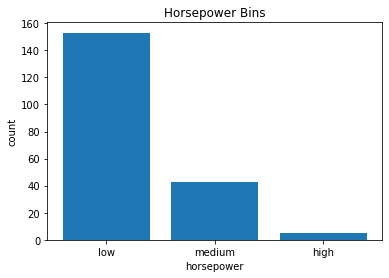

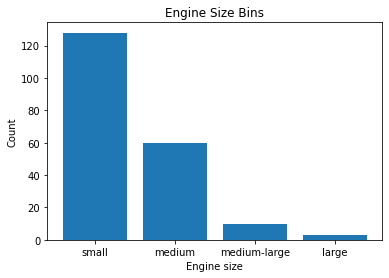

In [16]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(hp_group, df["horsepower_bin"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower Bins")
plt.pyplot.show()

pyplot.bar(eng_group, df["engine_bin"].value_counts())
plt.pyplot.xlabel("Engine size")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Engine Size Bins")
plt.pyplot.show()

In [17]:
# Assign dummy values to columns with binary categorical data

dummy_1 = pd.get_dummies(df["fuel-type"])
dummy_1.rename(columns={"diesel":"fuel-type-diesel", "gas":"fuel-type-gas"}, inplace=True)

df = pd.concat([df, dummy_1], axis=1)
df.drop("fuel-type", axis =1, inplace = True)
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower_bin,engine_bin,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21.0,27.0,13495.0,low,medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21.0,27.0,16500.0,low,medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19.0,26.0,16500.0,medium,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24.0,30.0,13950.0,low,small,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18.0,22.0,17450.0,low,medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19.0,25.0,15250.0,low,medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110,5500.0,19.0,25.0,17710.0,low,medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110,5500.0,19.0,25.0,18920.0,low,medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140,5500.0,17.0,20.0,23875.0,medium,medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101,5800.0,23.0,29.0,16430.0,low,small,0,1


In [18]:
# aspiration
dummy_2 = pd.get_dummies(df["aspiration"])
dummy_2.rename(columns={"std":"aspiration-std", "turbo":"aspiration-turbo"}, inplace=True)

df = pd.concat([df, dummy_2], axis = 1)
df.drop("aspiration", axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-L/100km,highway-L/100km,price,horsepower_bin,engine_bin,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21.0,27.0,13495.0,low,medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21.0,27.0,16500.0,low,medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19.0,26.0,16500.0,medium,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24.0,30.0,13950.0,low,small,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18.0,22.0,17450.0,low,medium,0,1,1,0


### II. Exploratory Data Analysis

In [19]:
#Dependencies, ignore it if you already install it
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [20]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279849,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.238789,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.362642,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.281932,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.242569,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.311922,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279027,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.254961,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.262781,-0.582027,-0.591309,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.047467,-0.033956,-0.034636,0.082269,0.241064,-0.241064,-0.218233,0.218233


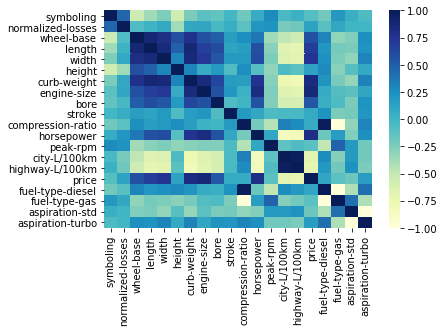

In [21]:
# simple heatmap for initial insight
ax1 = sns.heatmap(df.corr(),  cmap="YlGnBu")

#### I divide these variables to several categories related to dimension related, engine-power related, fuel-consumsion, bodystyle, and drive-wheels

#### We need make a different heatmap for "body-style" and "drive-wheels" correlation with "price"

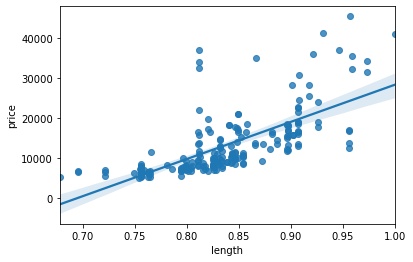

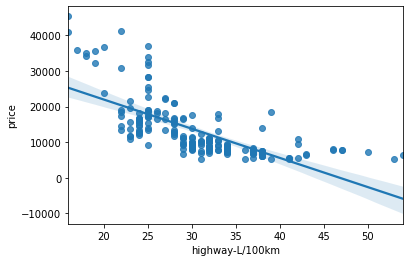

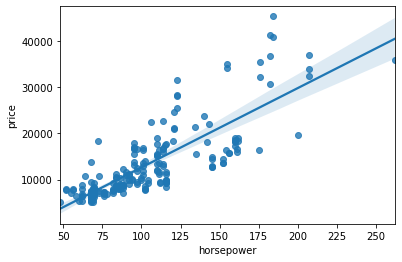

In [38]:
#linear regression for dimension related parameter 
ax_length = sns.regplot("length", "price", data = df)
plt.show()

#linear regression for fuel consumption related parameter 
ax_length = sns.regplot("highway-L/100km", "price", data = df)
plt.show()

#linear regression for enginepower related parameter 
ax_length = sns.regplot("horsepower", "price", data = df)
plt.show()

In [25]:
df_group_var = df[["body-style","drive-wheels","price"]]
group_categorical = df_group_var.groupby(["body-style", "drive-wheels"], as_index=False).mean()
group_categorical.sort_values(["price"]).reset_index(drop=True)

,body-style,drive-wheels,price
0,hatchback,4wd,7603.000000
1,hardtop,fwd,8249.000000
2,hatchback,fwd,8396.387755
3,wagon,4wd,9095.750000
4,sedan,fwd,9811.800000
5,wagon,fwd,9997.333333
6,convertible,fwd,11595.000000
7,sedan,4wd,12647.333333
8,hatchback,rwd,14337.777778
9,wagon,rwd,16994.222222


In [29]:
# make pivot table for categorical variables above
pivot1 = group_categorical.pivot(index = 'drive-wheels', columns = 'body-style')
pivot1 = pivot1.fillna(0)

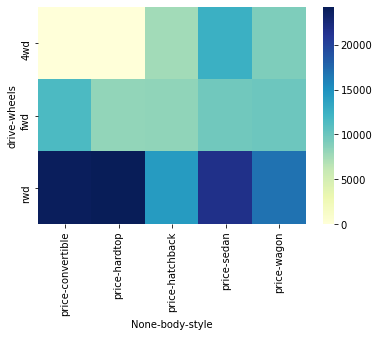

In [31]:
ax2 = sns.heatmap(pivot1, cmap="YlGnBu")

#### Other correlation parameters

In [39]:
from scipy import stats

In [43]:
# Pearson and P-value for "drive-wheels" vs "price"
pearson_dw, p_value_dw = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient for \"drive-wheels\" is", pearson_dw, " with a P-value of P =", p_value_dw)  

# Pearson and P-value for "horsepower" vs "price"
pearson_hp, p_value_hp = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient for \"horsepower\" is", pearson_hp, " with a P-value of P =", p_value_hp)  

# Pearson and P-value for "length" vs "price"
pearson_l, p_value_l = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient for \"length\" is", pearson_l, " with a P-value of P =", p_value_l) 

# Pearson and P-value for "bore" vs "price"
pearson_bore, p_value_bore = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient for \"bore\" is", pearson_bore, " with a P-value of P =", p_value_bore)  

# Pearson and P-value for "city-l/100km" vs "price"
pearson_cfuel, p_value_cfuel = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient for \"city-L/100km\" is", pearson_cfuel, " with a P-value of P =", p_value_cfuel)  

The Pearson Correlation Coefficient for "drive-wheels" is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20
The Pearson Correlation Coefficient for "horsepower" is 0.8096068016571054  with a P-value of P = 6.273536270650504e-48
The Pearson Correlation Coefficient for "length" is 0.6906283804483642  with a P-value of P = 8.016477466158759e-30
The Pearson Correlation Coefficient for "bore" is 0.5431553832626602  with a P-value of P = 8.049189483935489e-17
The Pearson Correlation Coefficient for "city-L/100km" is -0.6865710067844677  with a P-value of P = 2.321132065567674e-29
